<a href="https://colab.research.google.com/github/mounesi/hh/blob/master/happyhotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving hotel_not_happy_reviews.csv to hotel_not_happy_reviews.csv
Saving hotel_happy_reviews.csv to hotel_happy_reviews.csv


In [2]:
import pandas as pd
df = pd.read_csv('hotel_happy_reviews.csv')
df.head()

,User_ID,Description,Is_Response,hotel_ID
0,id10329,Stayed here with husband and sons on the way t...,happy,8
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3


In [3]:
df_not = df = pd.read_csv('hotel_not_happy_reviews.csv')
df_not.head()

,User_ID,Description,Is_Response,hotel_ID
0,id10326,The room was kind of clean but had a VERY stro...,not happy,3
1,id10327,I stayed at the Crown Plaza April -- - April -...,not happy,9
2,id10328,I booked this hotel through Hotwire at the low...,not happy,3
3,id10330,My girlfriends and I stayed here to celebrate ...,not happy,3
4,id10332,My husband and I have stayed in this hotel a f...,not happy,7


In [4]:
# Data Information
df.info()
print("-----------")
print(df.nunique())
print("-----------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      12411 non-null  object
 1   Description  12411 non-null  object
 2   Is_Response  12411 non-null  object
 3   hotel_ID     12411 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 388.0+ KB
-----------
User_ID        12411
Description    12411
Is_Response        1
hotel_ID          10
dtype: int64
-----------


In [5]:
df_freq = df['hotel_ID'].value_counts(ascending=True)
df_freq

6      334
9      483
10     734
8      850
2     1012
5     1142
3     1612
1     1750
4     2196
7     2298
Name: hotel_ID, dtype: int64

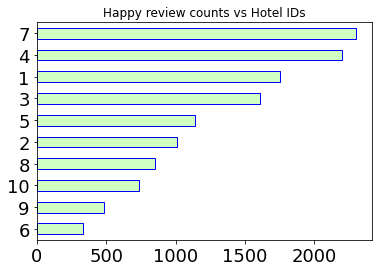

In [6]:
df_freq.plot(kind = 'barh', edgecolor='blue', color=(0.7, 1, 0.6, 0.6), title =  'Happy review counts vs Hotel IDs', fontsize = 18)

In [7]:
df_not_freq = df_not['hotel_ID'].value_counts(ascending=True)
df_not_freq

6      334
9      483
10     734
8      850
2     1012
5     1142
3     1612
1     1750
4     2196
7     2298
Name: hotel_ID, dtype: int64

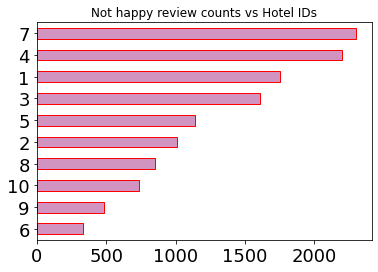

In [8]:
df_not_freq.plot(kind = 'barh', edgecolor='red', color=(0.7, .3, 0.6, 0.6), title =  'Not happy review counts vs Hotel IDs', fontsize = 18)

In [9]:
#@title Set topic modeling algorithm arguments for Happy Hotel

no_topics =  5#@param {type:"integer"}

no_top_words =  5#@param {type:"integer"}

no_top_documents = 3 #@param {type:"integer"}

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

In [10]:
dataset_df = df

In [11]:
documents = df['Description']
documents.head()

0    The room was kind of clean but had a VERY stro...
1    I stayed at the Crown Plaza April -- - April -...
2    I booked this hotel through Hotwire at the low...
3    My girlfriends and I stayed here to celebrate ...
4    My husband and I have stayed in this hotel a f...
Name: Description, dtype: object

In [12]:

"#@title Run NMF"

def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

print("NMF Topics")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)
print("--------------")

NMF Topics
Topic 0:
hotel location rooms great staff
this was a nice hotel. the staff was great and nice. Only stayed for one night so really didn't get to do too much in the hotel itself. but i would come back.
Just returned from a - night stay at the Park Central. We were a little concerned after reading the reviews about the hotel but can honestly say that this hotel was fine. It is in a great location, within walking distance to Central Park and Times Square, and the bus stops right outside the hotel. The decor was a bit dull but bedding and bathroom was very clean. The staff also seemed very friendly and helpful. The cost of this hotel was very reasonable, and for the price we couldn't have really asked for more. Would definately recommend this hotel for its location and would not worry about saying there again.
This was our first trip to NYC. The hotel is a beautiful structure inside and out. When you walk in, it is like taking a time machine.
Looks are one thing, but comfort is 

In [13]:

"#@title Run LDA"

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

print("LDA Topics")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

LDA Topics
Topic 0:
hotel good location walk area
Stayed here for - nights on a quick visit to San Diego and Seaworld. I chose it because it was Number - on TripAdvisor at the time and was well reviewed. Its a great stopover hotel, near the airport and Seaworld -- minutes away, service was great, hotel very clean, but it is a basic no frills stay and has a small outdoor pool. It was our first visit to San Diego so quite difficult to compare to any other hotels in the area. If you are driving there from LA, we stopped at Del Mar were there are some great restaurants looking on to the beach.
Nothing wrong with the hotel itself. Rooms were clean and the staff were very nice but the hotel is a bit out of the way from the main sights of Washington and there is not much in the area. The hotel mostly feels like you are placed in the middle of a residential neighborhood. However, there is a pharmacy and liquor store nearby and it is very close to the National's ball park. There is also a subwa

# find dominant topic

In [15]:
from gensim.test.utils import datapath
from gensim import corpora
from gensim import models
import pandas as pd 
import matplotlib.pyplot as plt
import pprint
import numpy as np
%matplotlib inline

In [24]:
#Load processed clean reviews data 
#reviews_df = pd.read_csv('HappyHotel/hotel_reviews_clean-reviews.csv')
reviews_df = df
# load optimized data from analysis 
#temp_file = datapath("optimized_model")
#optimal_model = models.LdaModel.load(temp_file)
optimal_model = lda_model
#load dictionary and corpus 
#reviews_dict = corpora.Dictionary.load('reviews_dict.dict')
reviews_dict = documents
#reviews_corpus = corpora.MmCorpus('reviews_corpus.mm')

In [26]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num) # shows the top 10 words for each topic
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=reviews_corpus, texts=reviews_df.clean_text.astype(str).apply(lambda x:x.split()))
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=reviews_dict, texts=reviews_df.clean_text.astype(str).apply(lambda x:x.split()))



refs: 

https://drive.google.com/drive/folders/1YpKoewscSz9_u7v5I8-rjRqxje2PcLxR


https://towardsdatascience.com/topic-modeling-for-everybody-with-google-colab-2f5cdc99a647

https://github.com/frcamacho/HappyHotel

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0




1. Non Negative Matrix Factorization (NMF) 
2. Latent Dirichlet Allocation (LDA)
3. Both algorithms take a document collection as input and return the main words in a topic and the documents that belong to a topic — a feature that makes the output interpretable

